In [1]:
import pandas as pd

train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
train.shape

(1460, 81)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [5]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

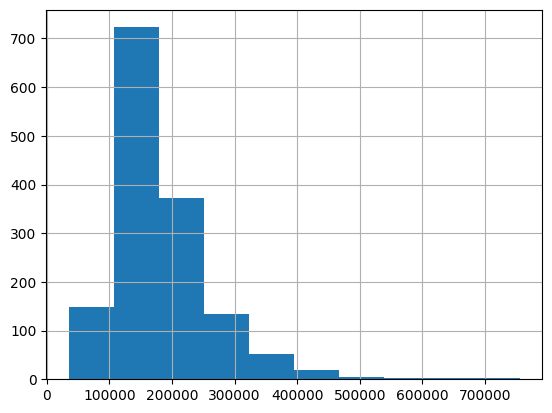

In [6]:
train['SalePrice'].hist()

In [7]:
# Separate feature types
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train.select_dtypes(include=['object']).columns

len(numeric_features), len(categorical_features)

(38, 43)

In [8]:
import matplotlib.pyplot as plt

# Correlation with SalePrice
corr = train[numeric_features].corr()['SalePrice'].sort_values(ascending=False)
corr.head(10)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

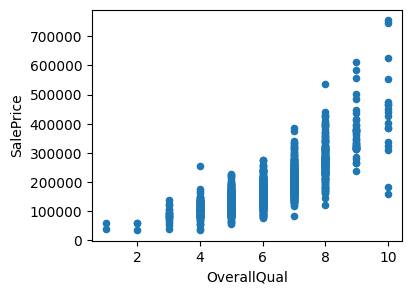

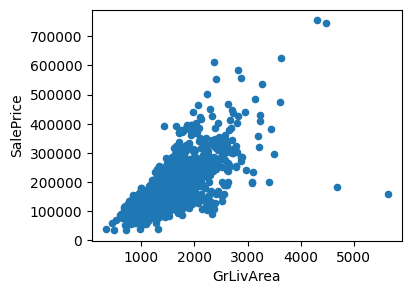

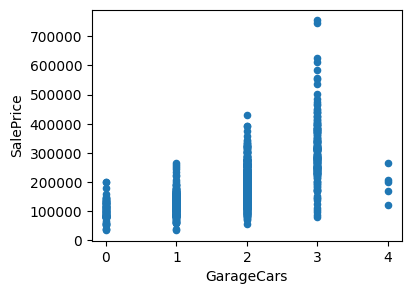

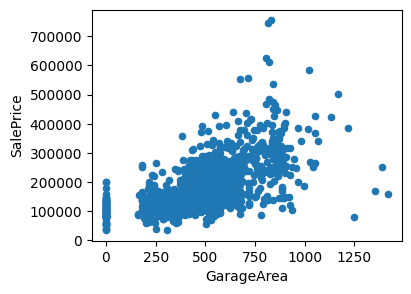

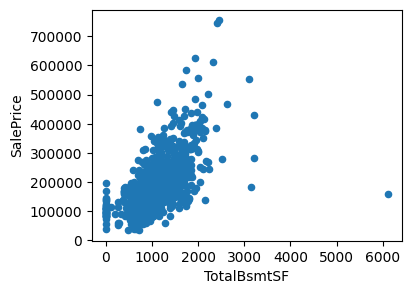

In [9]:
top_features = corr.index[1:6]  # skip SalePrice itself

for col in top_features:
    train.plot.scatter(x=col, y='SalePrice', figsize=(4,3))
    plt.show()


In [10]:
# Example: OverallQual is numeric but acts categorical
train.groupby('OverallQual')['SalePrice'].median()


OverallQual
1      50150.0
2      60000.0
3      86250.0
4     108000.0
5     133000.0
6     160000.0
7     200141.0
8     269750.0
9     345000.0
10    432390.0
Name: SalePrice, dtype: float64

In [11]:
train.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).head(10)


Neighborhood
NridgHt    315000.0
NoRidge    301500.0
StoneBr    278000.0
Timber     228475.0
Somerst    225500.0
Veenker    218000.0
Crawfor    200624.0
ClearCr    200250.0
CollgCr    197200.0
Blmngtn    191000.0
Name: SalePrice, dtype: float64

In [12]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing.head(10)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64

In [13]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

missing.head(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
dtype: int64

In [14]:
missing_percent = (missing / len(train)) * 100
missing_percent.head(15)


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
dtype: float64

In [15]:
train[['PoolQC', 'SalePrice']].head(10)


,PoolQC,SalePrice
0,NaN,208500
1,NaN,181500
2,NaN,223500
3,NaN,140000
4,NaN,250000
5,NaN,143000
6,NaN,307000
7,NaN,200000
8,NaN,129900
9,NaN,118000


In [16]:
import pandas as pd
import numpy as np

train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')


In [17]:
structural_cols = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
]

for col in structural_cols:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')


In [18]:
numeric_cols = train.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    if train[col].isnull().sum() > 0:
        median = train[col].median()
        train[col] = train[col].fillna(median)
        test[col] = test[col].fillna(median)


In [19]:
categorical_cols = train.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if train[col].isnull().sum() > 0:
        mode = train[col].mode()[0]
        train[col] = train[col].fillna(mode)
        test[col] = test[col].fillna(mode)


In [20]:
train.isnull().sum().sum(), test.isnull().sum().sum()


(np.int64(0), np.int64(22))

In [21]:
test.isnull().sum()[test.isnull().sum() > 0]


MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [22]:
# Fix remaining missing values in test using train statistics
for col in test.columns:
    if test[col].isnull().sum() > 0:
        if test[col].dtype == 'object':
            # categorical -> use train mode
            test[col] = test[col].fillna(train[col].mode()[0])
        else:
            # numeric -> use train median
            test[col] = test[col].fillna(train[col].median())


In [24]:
train.isnull().sum().sum(), test.isnull().sum().sum()


(np.int64(0), np.int64(0))

In [25]:
qual_map = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'None': 0
}

ordinal_cols = [
    'ExterQual','ExterCond','BsmtQual','BsmtCond',
    'HeatingQC','KitchenQual','FireplaceQu',
    'GarageQual','GarageCond'
]

for col in ordinal_cols:
    train[col] = train[col].map(qual_map)
    test[col] = test[col].map(qual_map)


In [26]:
train[ordinal_cols].head()


,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,4,3,4,3,5,4,0,3,3
1,3,3,4,3,5,3,3,3,3
2,4,3,4,3,5,4,3,3,3
3,3,3,3,4,4,4,4,3,3
4,4,3,4,3,5,4,3,3,3


In [27]:
# Nominal categorical features (no inherent order)
nominal_cols = train.select_dtypes(include=['object']).columns
len(nominal_cols)


34

In [28]:
# One-hot encode nominal features
train_encoded = pd.get_dummies(train, columns=nominal_cols)
test_encoded = pd.get_dummies(test, columns=nominal_cols)

# Align train & test
train_encoded, test_encoded = train_encoded.align(
    test_encoded, join='left', axis=1, fill_value=0
)


In [29]:
X = train_encoded.drop('SalePrice', axis=1)
y = train_encoded['SalePrice']


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

np.float64(73973.26392253708)

In [32]:
test_preds = model.predict(test_encoded)

submission = pd.DataFrame({
    'Id': pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')['Id'],
    'SalePrice': test_preds
})

submission.to_csv('submission_day6.csv', index=False)
submission.head()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- SalePrice


In [33]:
# Safety: remove SalePrice from test if present
if 'SalePrice' in test_encoded.columns:
    test_encoded = test_encoded.drop(columns=['SalePrice'])


In [34]:
X.columns.equals(test_encoded.columns)


True

In [35]:
test_preds = model.predict(test_encoded)

submission = pd.DataFrame({
    'Id': pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')['Id'],
    'SalePrice': test_preds
})

submission.to_csv('submission_day6.csv', index=False)
submission.head()


,Id,SalePrice
0,1461,125549.391197
1,1462,161333.201417
2,1463,180415.957663
3,1464,185868.203052
4,1465,220871.118873
